# Indian Startup Data Exploration

India is one of the fastest growing economy in the world. There are a lot of innovative startups coming up in the region and a lot of funding for these startups as well.

Wanted to know what type of startups are getting funded in the last few years?

Wanted to know who are the important investors? 

Wanted to know the hot fields that get a lot of funding these days?

Well, investors as well as startup founders have these questions in mind too. There are two main scenarios:

* Investors are forming a partnership with the startups they choose to invest in – if the company turns a profit, investors make returns proportionate to their amount of equity in the startup; if the startup fails, the investors lose the money they’ve invested. So, they want to know, which startup to invest in.

* Start-up companies often look to angel or investors to raise much-needed capital to get their business off the ground - but how does one value a brand new company?

This dataset is a chance to explore the Indian start up scene. Deep dive into funding data,derive insights to answer the above questions and also peek into the future of the market. 

We have been provided with data containing features like date, industry verticals, startup location,investment type,amount of investment,investor names etc.

Lets, start exploring and analyzing the data then!

## Importing Libraries

In [2]:
import os
import string
import datetime
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
# import seaborn as sns
# color = sns.color_palette()

%matplotlib inline

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly_express as px

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999



### Load the data

In [4]:
df = pd.read_csv('../data/startup_data.csv')

In [5]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks,year,yearmonth,CleanedAmount
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bangalore,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN,2020,2020-01-01,200000000.0
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,NCR,Susquehanna Growth Equity,Series C,"80,48,394",NaN,2020,2020-01-01,8048394.0
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Series B,"1,83,58,860",NaN,2020,2020-01-01,18358860.0
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,NCR,Vinod Khatumal,Preseries A,"30,00,000",NaN,2020,2020-01-01,3000000.0
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Funding,"18,00,000",NaN,2020,2020-01-01,1800000.0


## Number Of Fundings


### Can we get an overview of the number of fundings that has changed over time?

In [6]:
# Getting the number of fundings according to year
cnt_srs = df["year"].value_counts()
# sorting the years in ascending order
cnt_srs = cnt_srs.sort_index()
# setting uo the bar graph
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    
)
# setting the layout
layout = go.Layout(
    title=go.layout.Title(
        text="Number of funding deals over years",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=500,
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")



* Years 2015 & 2016 has got more number of fundings compared to the recent years

* We can see a clear decling trend in the number of funding deals from 2016. Not sure of the exact reason. One thing could be that not all the funding deals are captured in the recent days.



In [89]:
# getting the number of fundings based on yearmonth
cnt_srs = df["yearmonth"].value_counts()
# sorting the data
cnt_srs = cnt_srs.sort_index()
# setting up the bar graph
trace = go.Scatter(
    x=cnt_srs.index.astype(str),
    y=cnt_srs.values
)

# setting up the layout
layout = go.Layout(
    title=go.layout.Title(
        text="Number of funding deals - month on month",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=500,
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")



We can see a steady decline here as well but seems to be increasing in the last few months.


## Funding Values


### Can we get an overview of the funding values investors usually invest?

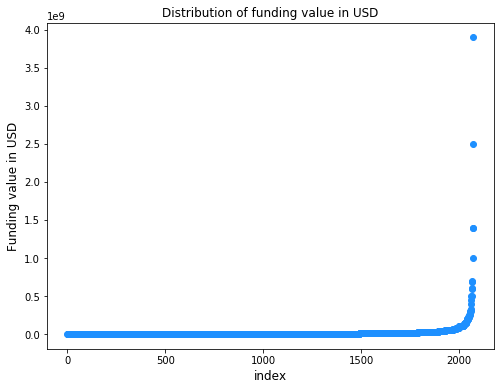

In [90]:
# subsetting the funding values
AmountInUSD = df["CleanedAmount"
AmountInUSD = AmountInUSD[AmountInUSD!=-999]
# plotting the scatter plot
plt.figure(figsize=(8,6))
plt.scatter(range(len(AmountInUSD)), np.sort(AmountInUSD.values), color="#1E90FF")
plt.xlabel('index', fontsize=12)
plt.ylabel('Funding value in USD', fontsize=12)
plt.title("Distribution of funding value in USD")
plt.show()



There are some extreme values at the right. Let us see who are these very well funded startups.



In [91]:
df.iloc[df["CleanedAmount"].sort_values(ascending=False).index[:5]]

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks,year,yearmonth,CleanedAmount
60,61,27/08/2019,Rapido Bike Taxi,Transportation,Bike Taxi,Bangalore,Westbridge Capital,Series B,"3,90,00,00,000",nan,2019,2019-08-01,3.900000e+09
651,652,11/08/2017,Flipkart,E-Commerce,Online Marketplace,Bangalore,Softbank,Private Equity,"2,50,00,00,000",nan,2017,2017-08-01,2.500000e+09
966,967,21/03/2017,Flipkart,E-Commerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,"1,40,00,00,000",nan,2017,2017-03-01,1.400000e+09
830,831,18/05/2017,Paytm,E-Commerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,"1,40,00,00,000",nan,2017,2017-05-01,1.400000e+09
31,32,25/11/2019,Paytm,FinTech,Mobile Wallet,NCR,Vijay Shekhar Sharma,Funding Round,"1,00,00,00,000",nan,2019,2019-11-01,1.000000e+09




* Rapido Bike Taxi looks like leading the pack by raising 3.9 Billion USD. But wait, this looks fishy. Infact Rapido raised 3.9 Billion INR and not USD. So this one is around 54 Million USD. This also shows that the data is not very accurate and so there should be caution in using it.
    
* Three of the next four high fundings are flipkart which seems to be expected and the other one is PayTM.
* Also Swiggy raised 1 Billion USD last year which is not in the data.

We will correct the data for Rapido and do the following analysis.


In [92]:
# Correcting the funding value
df["CleanedAmount"][df["CleanedAmount"]==3900000000] = 50000000

# Getting the sum, count and mean values of funding
cnt_df = df.groupby('year')['CleanedAmount'].agg(["sum","count","mean"])
# plotting a graph of the sum of fundings
cnt_srs = cnt_df["sum"]
cnt_srs = cnt_srs.sort_index()

trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color="#1E90FF",
    ),
)

layout = go.Layout(
    title=go.layout.Title(
        text="Sum of funding value in each year",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=500,
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")

* Though 2016 is the year with most number of funding deals, it is the year with the lowest sum (2020 is yet to complete)
* 2017 has got the highest total amount of funding in the last 5 years. Out of the 10B in 2017, 5.5B is raised by Flipkart and PayTM in 3 deals which we can see in the table above the plot.



In [93]:
# plotting a graph for the mean funding values
cnt_srs = cnt_df["mean"]
cnt_srs = cnt_srs.sort_index()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color="#1E90FF",
    ),
)

layout = go.Layout(
    title=go.layout.Title(
        text="Mean of funding value in each year",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=500,
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")

* When it comes to the mean value of funding, 2020 leads the pack with an average of 55 Million USD.
* But the year has just started, should the mean funding of 2020 be considered or there is something we are missing? Check the number of funds raised in the year 2020, it is pretty less.
* We will consider 2019 data as valid data for mean funding.

## Investment Type

Now let us explore the investment type of the funding deals like whether it is seed funding, private equity funding or so on.


### Can we get an idea about the number and value of funding deals with respect to the investment type?

In [94]:
# Creating a function to plot horizontal bar graph
def horizontal_bar_chart(srs):
    trace = go.Bar(
        x=srs.values[::-1],
        y=srs.index[::-1],
        showlegend=False,
        orientation = 'h'
    )
    return trace

cnt_srs = df['InvestmentType'].value_counts()[:10]
layout = go.Layout(
    title=go.layout.Title(
        text="Count of Investment type",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=600,
)

data = [horizontal_bar_chart(cnt_srs)]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")





* Seed funding tops the chart closely followed by Private Equity and seed angel funding
    
* We can clearly see the decreasing number of deals as we move up the stages of funding rounds like Series A, B, C & D



In [95]:
cnt_df = df.groupby('InvestmentType')['CleanedAmount'].agg(['size', 'sum', 'mean'])
cnt_df = cnt_df.sort_values(by="size", ascending=False)
cnt_df = cnt_df.iloc[:10,:]
cnt_srs = cnt_df["sum"]
cnt_srs = cnt_srs[["Seed Funding", "Seed Angel Funding", "PreSeries A", "Series A", "Series B", "Series C", "Series D", "Private Equity"]]
layout = go.Layout(
    title=go.layout.Title(
        text="Sum of investment amount by Investment Type",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=600,
)

data = [horizontal_bar_chart(cnt_srs)]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")




* Private equity funding seems to be the one with high number of deals and the highest sum value of 26.7B raised as well
* Though seed funding has 1388 funding deals, the sum of money raised is just about 500M since they happen during the very early stages of a startup.

Now let us see what is the average value raised by the startups in each of these funding rounds.


In [96]:
#cnt_df = cnt_df.iloc[:10,:]
cnt_df = df.groupby('InvestmentType')['CleanedAmount'].agg(['size', 'sum', 'mean'])
cnt_df = cnt_df.sort_values(by="size", ascending=False)
cnt_srs = cnt_df["mean"]
cnt_srs = cnt_srs[["Seed Funding", "Seed Angel Funding", "PreSeries A", "Series A", "Series B", "Series C", "Series D", "Private Equity"]]
layout = go.Layout(
    title=go.layout.Title(
        text="Mean Investment amount by Funding Round",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=600,
)

data = [horizontal_bar_chart(cnt_srs)]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")

We can see a clear increase in the mean funding value as we go up the funding round ladder from Seed funding to Series D as expected.

## Location

### Find about the major start up hubs in India.

Now let us explore the location of the startups that got funded. This can help us to understand the startup hubs of India.

Since there are multiple locations in the data, let us plot the top 10 locations. We will also club New Delhi, Gurgaon & Noida together to form NCR for the below chart.

In [97]:
# similar function like earlier just with an additional parameter for colour
def horizontal_bar_chart(srs, color):
    trace = go.Bar(
        x=srs.values[::-1],
        y=srs.index[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace
# plotting the graph with respect to location

cnt_srs = df['City'].value_counts()[:14]
layout = go.Layout(
    title=go.layout.Title(
        text="Number of funding deals in each location",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=800,
)

data = [horizontal_bar_chart(cnt_srs, "#1E90FF")]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")




* NCR & Bangalore are almost equal to each other with respect to number of funding deals followed by Mumbai in third place.
    
* Chennai, Hyderabad & Pune are the next set of cities are that are catching up.



In [98]:
# subsetting the data with respec to City
cnt_df = df.groupby('City')['CleanedAmount'].agg(["size", "sum", "mean"])
cnt_df = cnt_df.sort_values(by="size", ascending=False)
cnt_df = cnt_df.iloc[:14,:]

# plotting a graph
cnt_srs = cnt_df['sum']
cnt_srs = cnt_srs.sort_values(ascending=False)
layout = go.Layout(
    title=go.layout.Title(
        text="Total funding value by location",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=800,
)

data = [horizontal_bar_chart(cnt_srs, "#1E90FF")]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")



* Though NCR tops the number of funding deals when it comes to the total funding value by location, Bangalore leads the way by a huge margin.



In [100]:
cnt_srs = cnt_df['mean']
cnt_srs = cnt_srs.sort_values(ascending=False)
layout = go.Layout(
    title=go.layout.Title(
        text="Mean funding value by location",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=800,
)

data = [horizontal_bar_chart(cnt_srs, "#1E90FF")]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")




* Bangalore tops the list here again
* Jaipur took the fourth spot with respect to mean funding value



In [102]:
# subsetting the data according to year, location and amount
temp_df = df.groupby(["City","year"])["CleanedAmount"].agg(["size", "mean"]).reset_index()
# selecting the major cities 
cities_to_use = ["Bangalore", "NCR", "Mumbai", "Chennai", "Pune", "Hyderabad"]
# subsetting the data according to our needs
temp_df = temp_df[temp_df["City"].isin(cities_to_use)]
temp_df.columns = ["City", "Year", "Count", "Mean"]

# plotting a graph
fig = px.scatter(temp_df, x="Year", y="City", color="City", size="Count")
layout = go.Layout(
    title=go.layout.Title(
        text="Number of funding deals by location over time",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=600,
    showlegend=False
)
fig.update_layout(layout)
fig.show()



In [103]:
fig = px.scatter(temp_df, x="Year", y="City", color="City", size="Mean")
layout = go.Layout(
    title=go.layout.Title(
        text="Mean funding value by location over time",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=600,
    showlegend=False
)
fig.update_layout(layout)
fig.show()


### Industry Vertical

Let us now have a look at the industry verticals and the number of funding deals for each vertical.


### Can we get an overview of the Industry verticals and the number of funding deals?

In [32]:
# subsetting the data accordin to Industry vertical
cnt_srs = df['IndustryVertical'].value_counts()[:10]
layout = go.Layout(
    title=go.layout.Title(
        text="Number of funding deals by Industry Vertical",
        x=0.5
    ),
    font=dict(size=14),
    width=800,
    height=600,
)

data = [horizontal_bar_chart(cnt_srs)]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="funding")



Consumer Internet is the most preferred industry segment for funding followed by Technology and E-commerce.



In [130]:
# Getting a subset of the data based on Industry vertical, year and amount
temp_df = df.groupby(["IndustryVertical","year"])["CleanedAmount"].agg(["size", "mean"]).reset_index()
# Major industries to be used
values_to_use = ["Consumer Internet", "Technology", "E-Commerce", "Healthcare", "Finance", "Logistics"]
temp_df = temp_df[temp_df["IndustryVertical"].isin(values_to_use)]
# excluding the year 2015 as it has only one major industry investment  that is E-commerce, you can include it if you want as well
temp_df = temp_df[temp_df["year"]!=2015]
temp_df.columns = ["IndustryVertical", "Year", "Count", "Mean"]

fig = px.scatter(temp_df, x="Year", y="IndustryVertical", color='IndustryVertical', size="Count")
layout = go.Layout(
    title=go.layout.Title(
        text="Number of funding deals by industry over time",
        x=0.5
    ),
    font=dict(size=14),
    width=600,
    height=600,
    showlegend=False
)
fig.update_layout(layout)
fig.show()

In [34]:
fig = px.scatter(temp_df, x="Year", y="IndustryVertical", color='IndustryVertical', size="Mean")
layout = go.Layout(
    title=go.layout.Title(
        text="Mean funding value by industry over time",
        x=0.5
    ),
    font=dict(size=14),
    width=600,
    height=600,
    showlegend=False
)
fig.update_layout(layout)
fig.show()

## Do it yourself

* Can we get information about the investors?
* Can we get information about the subvertical?